# **PREDIKSI CUACA**

Dalam project ini kita akan melakukan prediksi cuaca dengan dataset **seattle-weather**.

Link **dataset**:
https://drive.google.com/file/d/1IIyYZEQReb4VavO_piu3qQeGK6VcwGJm/view?usp=sharing

## **Data Preprocessing**

1. Isi _code-cell_ dibawah dengan kode untuk:
    - **membaca dataset** _seattle-weather_
    - **menampilkan 15** baris data teratas



In [43]:
# tulis jawaban anda pada code-cell berikut

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
from sklearn.neighbors import KNeighborsClassifier

In [44]:
# tulis jawaban anda pada code-cell berikut

df = pd.read_csv("weather.csv")
df

,date,precipitation,temp_max,temp_min,wind,weather
0,1/1/2012,3.0,12.8,5.0,4.7,drizzle
1,1/2/2012,10.9,10.6,2.8,4.5,rain
2,1/3/2012,0.8,11.7,7.2,2.3,rain
3,1/4/2012,20.3,12.2,5.6,4.7,rain
4,1/5/2012,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,12/27/2015,8.6,4.4,1.7,2.9,rain
1457,12/28/2015,1.5,5.0,1.7,1.3,rain
1458,12/29/2015,3.0,7.2,0.6,2.6,fog
1459,12/30/2015,3.0,5.6,-1.0,3.4,sun


In [45]:
# tulis jawaban anda pada code-cell berikut

df.head(15)

,date,precipitation,temp_max,temp_min,wind,weather
0,1/1/2012,3.0,12.8,5.0,4.7,drizzle
1,1/2/2012,10.9,10.6,2.8,4.5,rain
2,1/3/2012,0.8,11.7,7.2,2.3,rain
3,1/4/2012,20.3,12.2,5.6,4.7,rain
4,1/5/2012,1.3,8.9,2.8,6.1,rain
5,1/6/2012,2.5,4.4,2.2,2.2,rain
6,1/7/2012,3.0,7.2,2.8,2.3,rain
7,1/8/2012,3.0,10.0,2.8,2.0,sun
8,1/9/2012,4.3,9.4,5.0,3.4,rain
9,1/10/2012,1.0,6.1,0.6,3.4,rain


2. Munculkan **informasi** dataset dan lakukan **cleaning data** yang dibutuhkan:
    - mengecek dan menghapus **nilai kosong**
    - menghapus (**_drop_**) kolom _"date"_
    - mengecek dan menghapus data yang memiliki **nilai duplikat**

In [46]:
# tulis jawaban anda pada code-cell berikut

print("Null value tiap kolom:")
print(df.isnull().sum())

Null value tiap kolom:
date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64


In [47]:
# tulis jawaban anda pada code-cell berikut

df.drop(['date'], axis=1, inplace=True)
df.head()

,precipitation,temp_max,temp_min,wind,weather
0,3.0,12.8,5.0,4.7,drizzle
1,10.9,10.6,2.8,4.5,rain
2,0.8,11.7,7.2,2.3,rain
3,20.3,12.2,5.6,4.7,rain
4,1.3,8.9,2.8,6.1,rain


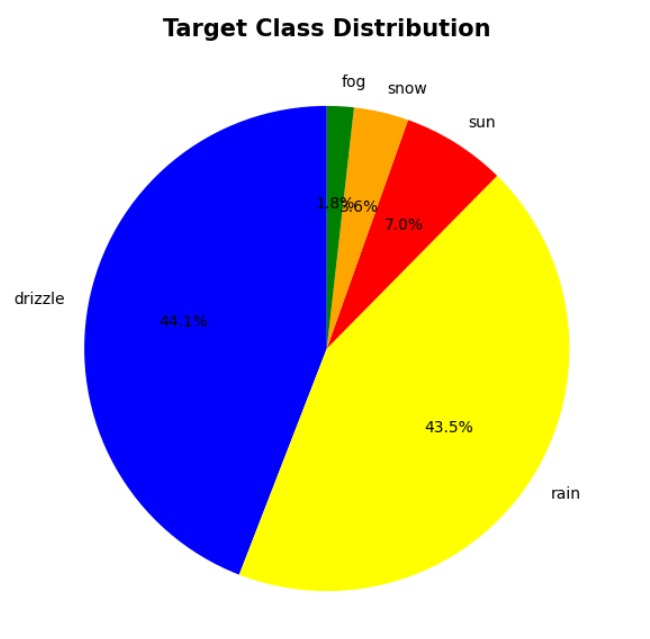

3. Diatas adalah contoh visualisasi menggunakan _diagram pie_,

    buatlah **visualisasi distribusi _target-class_** seperti diatas!

In [48]:
# tulis jawaban anda pada code-cell berikut

print("Distribusi kelas weather :")
print(df['weather'].value_counts())

Distribusi kelas weather :
rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: weather, dtype: int64


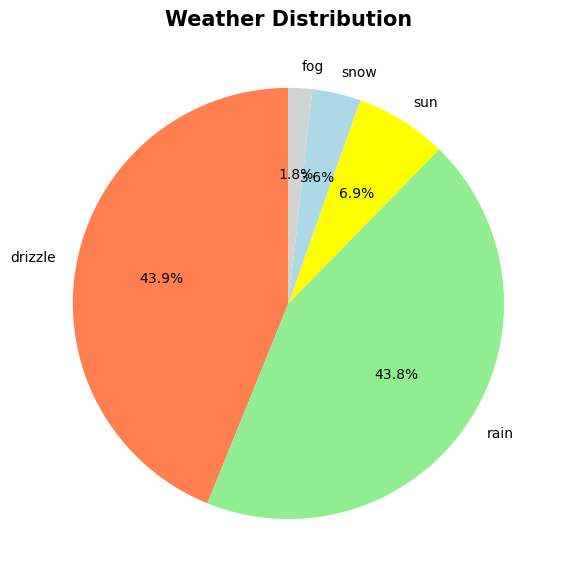

In [49]:
plt.figure(figsize=(7, 7))
plt.pie(df['weather'].value_counts(), labels=df['weather'].unique(), autopct='%1.1f%%', colors=['coral', 'lightgreen', 'yellow','lightblue','lightgrey'], startangle=90)
plt.title("Weather Distribution", fontsize=15, fontweight="bold")
plt.show()

4. Anda akan melakukan **visualisasi relasi antar fitur** menggunakan _diagram scatter_.

    Perbaiki kata **'fix_me'** pada _code-cell_ dibawah!

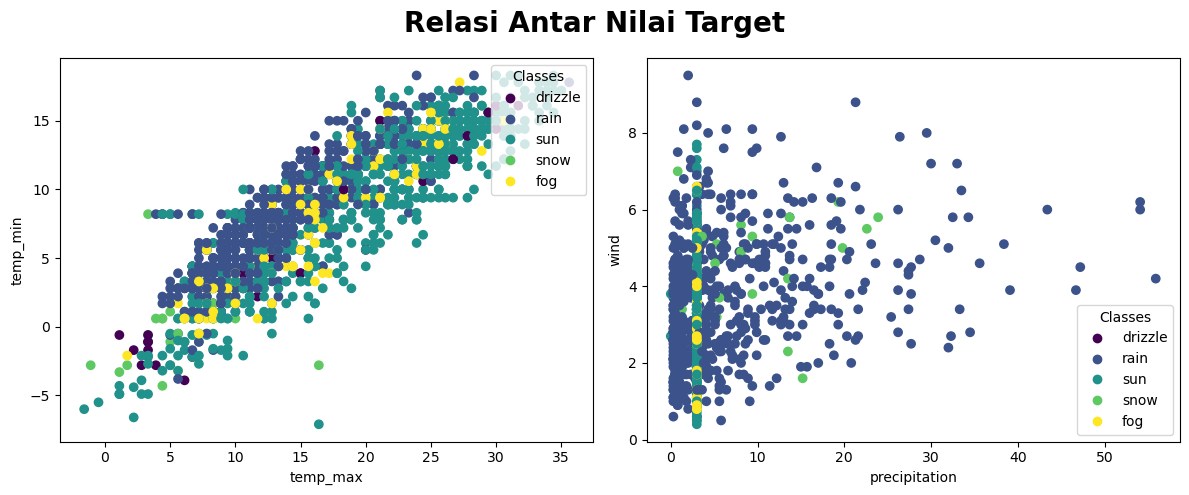

In [50]:
target_names= df['weather'].unique()

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

target = df['weather'].replace({
  'drizzle': 0,
  'rain': 1,
  'sun' :2,
  'snow': 3,
  'fog': 4
})

# Visualisasi relasi fitur temp_max dan temp_min
a_scatter =axs[0].scatter(df['temp_max'], df['temp_min'], c=target)
axs[0].set(xlabel="temp_max", ylabel="temp_min")
axs[0].legend(a_scatter.legend_elements()[0], target_names, loc="upper right", title="Classes")

# Visualisasi relasi fitur precipitation dan wind
b_scatter = axs[1].scatter(df['precipitation'], df['wind'], c=target)
axs[1].set(xlabel="precipitation", ylabel="wind")
axs[1].legend(b_scatter.legend_elements()[0], target_names, loc="lower right", title="Classes")

fig = fig.suptitle("Relasi Antar Nilai Target", fontsize=20, fontweight="bold")
plt.tight_layout()

<Axes: xlabel='temp_min', ylabel='Count'>

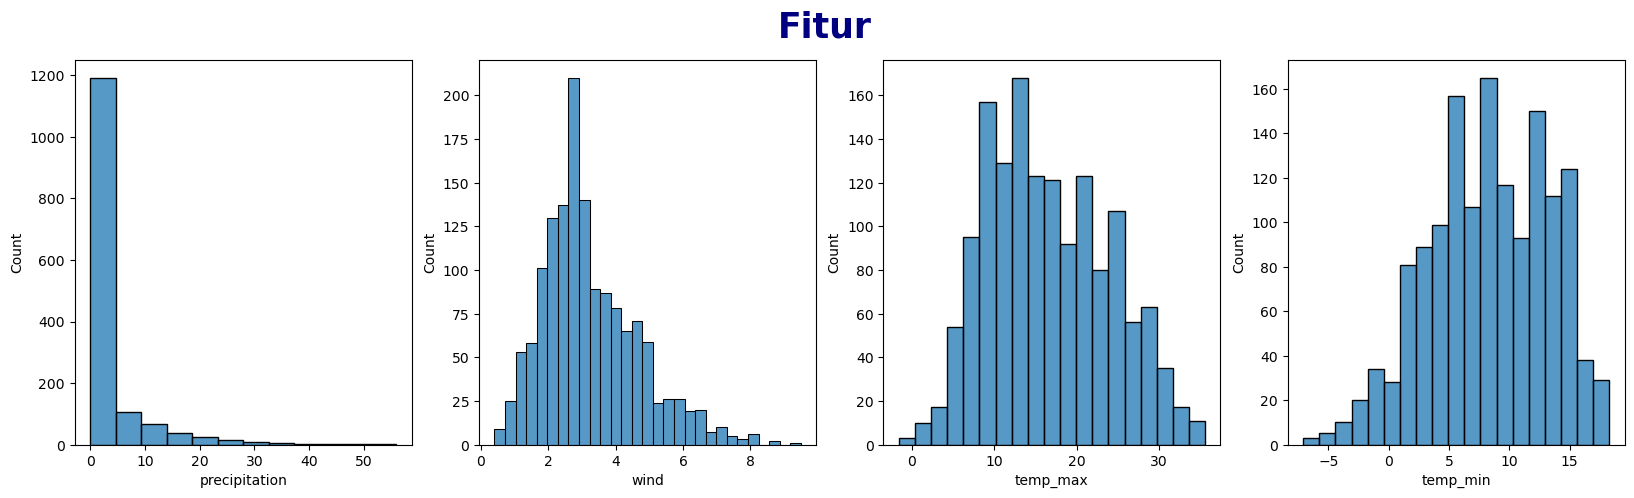

In [51]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
plt.suptitle('Fitur', fontsize=25, fontweight='bold', color='navy')

# axis 1
sns.histplot(data=df, x='precipitation', ax=axes[0])

# axis 2
sns.histplot(data=df, x='wind', ax=axes[1])

# axis 3
sns.histplot(data=df, x='temp_max', ax=axes[2])

# axis 4
sns.histplot(data=df, x='temp_min', ax=axes[3])

## **Modelling**

5. **Bagi dataset** menjadi _train-set_ dan _test-set_ dengan ketentuan sebagai berikut:

    a. X = seluruh kolom fitur kecuali kolom target

    b. y = kolom target
    
    c. Bagi dengan rasio 70% _train-set_ dan 30% _test-set_

In [52]:
# tulis jawaban anda pada code-cell berikut

X = df.iloc[:, :-1]
y = df['weather']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

6. **Perbaiki kata 'fix_me'** pada _code-cell_ dibawah untuk **menampilkan visualisasi rasio _target-class_** pada _train-set_ dan _test-set_!

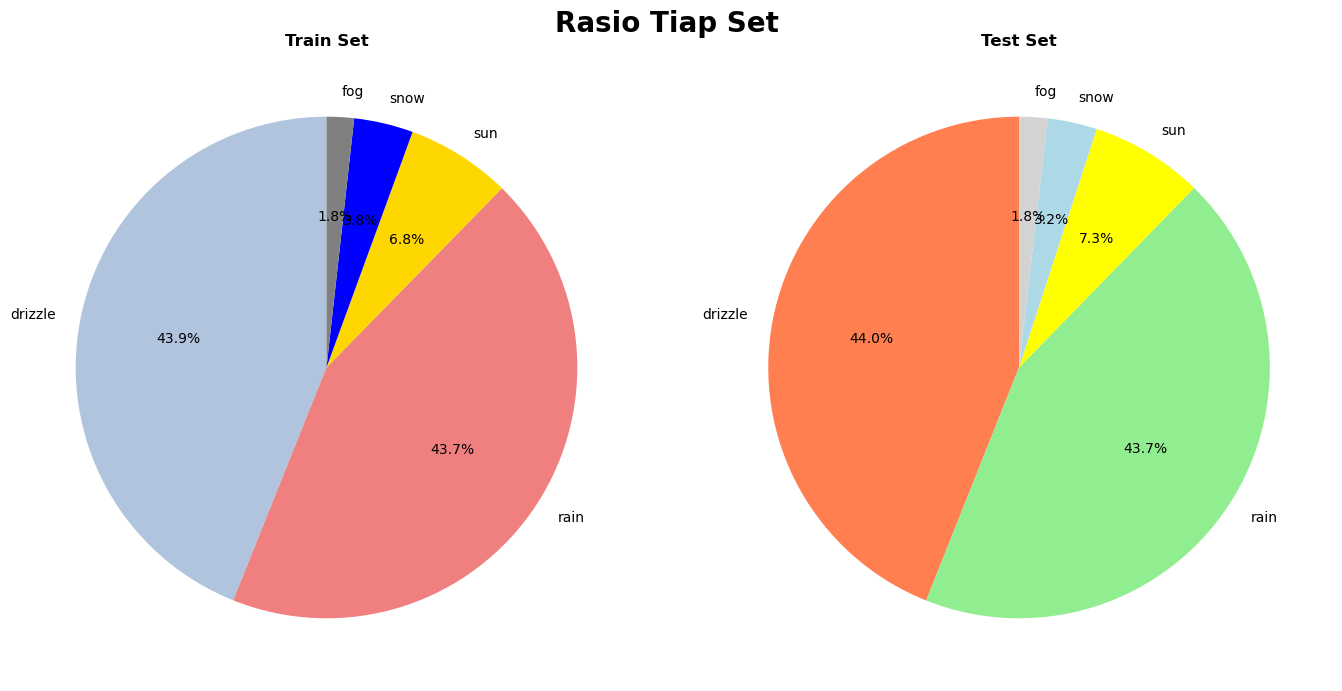

In [53]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))
target_names = df['weather'].unique()
colors1 = ['lightsteelblue', 'lightcoral', 'gold','blue','grey']
colors2 = ['coral', 'lightgreen', 'yellow','lightblue','lightgrey']

#Train dataset
axs[0].pie(y_train.value_counts(), labels=target_names, colors=colors1, autopct='%1.1f%%', startangle=90)
axs[0].set_title("Train Set", fontweight="bold")

#Test dataset
axs[1].pie(y_test.value_counts(), labels=target_names, colors=colors2, autopct='%1.1f%%', startangle=90)
axs[1].set_title("Test Set", fontweight="bold")

fig = fig.suptitle("Rasio Tiap Set", fontsize=20, fontweight="bold")
plt.tight_layout()

7.  Buatlah model dengan salah satu algoritma klasifikasi lalu latih dan prediksi dataset!

In [54]:
# tulis jawaban anda pada code-cell berikut

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

## **Evaluasi**

8. Munculkan akurasi yang dihasilkan dari model yang anda gunakan.

In [55]:
# Lakukan evaluasi model

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Accuracy: 0.744874715261959
Precision: 0.708349791595987
Recall: 0.744874715261959
F1 Score: 0.7238316155888106


C:\Users\ACER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## **Esai**

9. Berikan kesimpulan dari project yang telah anda buat.

_Tulis **jawaban** no. 9 disini_

Untuk klasifikasi kali ini menggunakan algoritma KNN,dengan target class berjumlah 5,menghasilkan akurasi sebesar 74% dengan mayoritas cuaca cerah dan hujan

10. Upload dan lampirkan link
    - **Video** penjelasan berdurasi 10-15 menit mengenai project anda.
    - **Repository Github** berisi file notebook (_.ipynb_) anda.

In [56]:
link_video = "https://drive.google.com/file/d/1gxhcxfaDoQ-K8-Fc4_mt8Sb7vAXmCPTM/view?usp=drive_link"
link_github = "https://github.com/isNothingSpecial/UTSBKD"